In [1]:
#tools to use
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
import pandas as pd
from bs4 import BeautifulSoup

We Downloaded from the Washington Post the text of Unabomber's Manifesto. As this is not part of Webtext corpus, we added it there to use it with webtext.words('manifesto.txt')
_Webtext Directory is C:\Users\chandra\AppData\Roaming\nltk_data\corpora\webtext_ 

In [2]:
import urllib.request, urllib.error, urllib.parse
url = "http://www.washingtonpost.com/wp-srv/national/longterm/unabomber/manifesto.text.htm"
response = urllib.request.urlopen(url)
webcontent = response.read()
clean_text = ' '.join(BeautifulSoup(webcontent, "html.parser").stripped_strings)

file_WP = open('C:\\Users\\chandra\\AppData\\Roaming\\nltk_data\\corpora\\webtext\\manifesto.txt', 'w')
file_WP.write(clean_text)
file_WP.close

file_WP = open('manifesto.txt', 'w')
file_WP.write(clean_text)
file_WP.close

<function TextIOWrapper.close()>

In [3]:
#Analyze & Print the  document

WP_words = webtext.words('manifesto.txt')
doc_analysis = nltk.FreqDist(WP_words)
doc_analysis

FreqDist({'the': 1735, '.': 1686, ',': 1540, 'of': 1251, 'to': 1078, 'a': 736, 'and': 719, 'that': 657, 'is': 611, 'in': 546, ...})

In [4]:
# How big the document is?
total_words= len(doc_analysis.keys())
print(f"Total Words = {total_words}")

Total Words = 4808


In [5]:
# Let's check the indiviual words'frequencies.
print ("Dict of all words")
all_words = dict([(m, n) for m, n in doc_analysis.items()])
from collections import Counter
dict(Counter(all_words).most_common(25))

Dict of all words


{'the': 1735,
 '.': 1686,
 ',': 1540,
 'of': 1251,
 'to': 1078,
 'a': 736,
 'and': 719,
 'that': 657,
 'is': 611,
 'in': 546,
 'be': 412,
 'for': 351,
 'it': 319,
 'or': 290,
 'are': 281,
 '-': 261,
 'have': 246,
 'society': 239,
 'not': 235,
 'will': 233,
 'as': 230,
 'by': 229,
 'they': 224,
 'system': 222,
 '(': 212}

In [6]:
# Dataframe of raw data
df_mani= pd.DataFrame([(m, n) for m, n in doc_analysis.items()],columns=['words','frequency'])

df= df_mani.sort_values(by='frequency',axis=0,ascending= False)
print ("High Frequency Words")
print(df.head(10))
print()
print ("Low Frequency Words")
print(df.tail(10))

High Frequency Words
   words  frequency
16   the       1735
1      .       1686
21     ,       1540
18    of       1251
28    to       1078
19     a        736
31   and        719
46  that        657
15    is        611
41    in        546

Low Frequency Words
           words  frequency
2752   saboteurs          1
2753    dropouts          1
2754   resisters          1
2759     million          1
2761   millionth          1
2762       share          1
2766      voters          1
2767  ordinarily          1
2768        vote          1
4807        Back          1


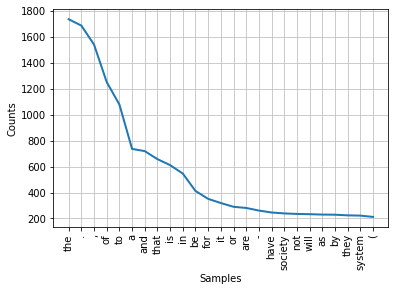

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
fre_distribution = nltk.FreqDist(WP_words)
fre_distribution.plot(25, cumulative=False)

In [8]:
# Real words len >1
df_words= pd.DataFrame([(m, n) for m, n in doc_analysis.items() if len(m)> 3], columns=['words','frequency']) 
df= df_words.sort_values(by='frequency',axis=0,ascending= False)

print ("High Frequency Words")
print(df.head(10))
print()
print ("Low Frequency Words")
print(df.tail(10))

High Frequency Words
       words  frequency
25      that        657
44      have        246
93   society        239
114     will        233
91      they        224
128   system        222
165   people        211
511    their        183
55      with        177
638    power        165

Low Frequency Words
                 words  frequency
2410           leeches          1
2414  environmentalist          1
2428            voters          1
2415         saboteurs          1
2416          dropouts          1
2417         resisters          1
2421           million          1
2423         millionth          1
2424             share          1
4269              Back          1


In [9]:
webcontent

b'<html>\n<head>\n<META NAME="public" CONTENT="19971230191509">\n<META NAME="document_name" CONTENT="/usr/ns-home/docs/wp-srv/national/longterm/unabomber/manifesto.text.htm">\n<META NAME="source" CONTENT="DI">\n<META NAME="content_type" CONTENT="text">\n<META NAME="keywords" CONTENT="">\n<META NAME="embargo_date" CONTENT="19971230">\n<META NAME="pub_date" CONTENT="19971230">\n<META NAME="create_date" CONTENT="19971230">\n<META NAME="event_date" CONTENT="19971230">\n<META NAME="kill_date" CONTENT="">\n<META NAME="story_type" CONTENT="HT">\n\n<!--plsfield:title-->\n\n<TITLE>washingtonpost.com: Unabomber Special Report\n</TITLE>\n</HEAD>\n<BODY link="#293158" vlink="#B00303" bgcolor="#ffffff" background="/wp-srv/national/images/wwimage/wwbck2.gif">\n<table width="580" border="0" cellpadding="0" cellspacing="0">\n<tr valign="top">\n<td width="324" bgcolor="#070431">\n<A href="/wp-srv/maps/tp_ip_bnr.map">\n<IMG src="/wp-srv/images/wp_strp.gif" ismap border="0" width="305" height="21"></a><b